# Team One: The Opioid Crisis in the United States

### Analysis
* OBSERVED TREND For Research Question 1: According to the data, there is an opioid crisis in America. Opioid related deaths increased by more than an order of magnitude in 17 years. (1999: 2.0 deaths per 100,000 population; 2016: 12.6 deaths per 100,000 population.) By comparison, there was a negligable increase in anaesthesia deaths during the same period. Males are almost twice as likely to be affected as females. The age range of 25 - 54 years is most likely to be affected by the crisis. White people are twice as likely to be affected as black people; indigenous peoples are also heavily affected, while asian and pacific islanders are least affected by the crisis. The crisis is distributed fairly evenly throughout the continental United States, although there is a band in the geographic center of the country that is relatively unaffected. Both coasts of the country are heavily affected. Some notable hot-spots include West Virginia, the New England region, The Mid-Atlantic states, West Texas, and the Pacific Northwest. Southern Alaska is affected, while Hawaii is only moderately affected.
* OBSERVED TREND For Research Question 2: 
* OBSERVED TREND For Research Question 3: 
* OBSERVED TREND For Research Question 3: 


###### Development team notes and caveats:
* 

#### Dependencies

In [2]:
import os                                                                    # os library

In [3]:
import numpy as np                                                           # numpy library

In [4]:
import pandas as pd                                                          # pandas library

In [5]:
import matplotlib.pyplot as plt                                              # pyplot module from matplotlib library

In [6]:
import geoplotlib                                                            # geoplotlib library

In [7]:
from geoplotlib.utils import BoundingBox                                     # BoundingBox module from geoplotlib.utils

In [8]:
from geoplotlib.colors import ColorMap                                       # ColorMap module from geoplotlib.colors

In [9]:
import seaborn as sns                                                        # seaborn library

In [10]:
import json                                                                  # json library

In [11]:
sns.set()                                                                    # switches to seaborn default display

#### Research Question 1: Does the crisis exist? If so, what is it's magnitude? Who is affected? Where is it occuring?

In [12]:
filename = 'Q1DS1.csv'                                                       # 1st data file for Q1

In [13]:
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to read data

In [14]:
q1ds1_df = pd.read_csv(csv_file, index_col="Year")                           # reads data from file
q1ds1_df.head()

,Year Code,Deaths,Population,Death Rate
Year,,,,
1999,1999,5594,279040168,2.004729
2000,2000,6011,281421906,2.135939
2001,2001,7088,284968955,2.487288
2002,2002,9318,287625193,3.239633
2003,2003,10389,290107933,3.581081


In [15]:
year_min = q1ds1_df.index.min()                                              # finds min and max dates
year_max = q1ds1_df.index.max()

In [16]:
plt.figure(figsize = (17,10))                                                # sets bar chart parameters
plt.title('Opioid Deaths By Year: %s to %s' % (year_min, year_max), fontdict = {'fontsize': 20})
plt.xlabel('Year', fontdict = {'fontsize': 16})
plt.ylabel('Deaths Per 100,000 Population', fontdict = {'fontsize': 16})
xvals = np.arange(len(q1ds1_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, q1ds1_df['Death Rate'], color='r', alpha=0.7, align="edge")
plt.xticks(tick_locations, q1ds1_df['Year Code'], rotation="horizontal")

([<matplotlib.axis.XTick at 0x286424f0198>,
 <a list of 18 Text xticklabel objects>)

In [17]:
axes = plt.gca()
c1min, c1max = axes.get_ylim()                                               # gets y limits, sanity check

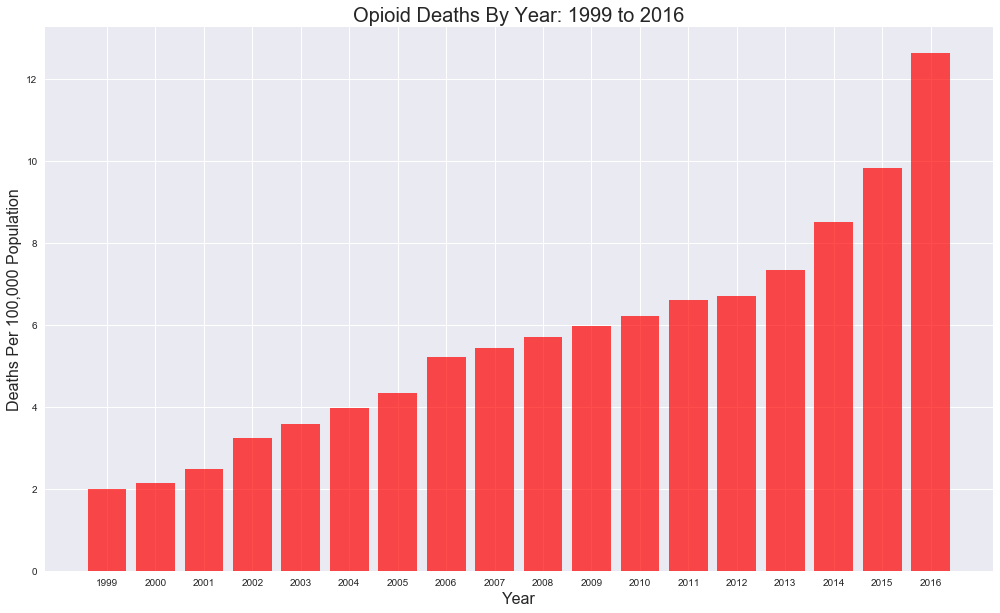

In [18]:
plt.show()                                                                   # displays plot

#### Sanity Check - Look at Anaesthesia Deaths For Same Period

In [19]:
filename = 'Q1DS2.csv'                                                       # 2nd data file for Q1

In [20]:
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to read data

In [21]:
q1ds2_df = pd.read_csv(csv_file, index_col="Year")                           # reads data from file

In [22]:
year_min = q1ds2_df.index.min()                                              # finds min and max dates
year_max = q1ds2_df.index.max()

In [23]:
plt.figure(figsize = (17,10))                                                # sets bar chart parameters
plt.title('Anaesthesia Deaths By Year: %s to %s' % (year_min, year_max), fontdict = {'fontsize': 20})
plt.xlabel('Year', fontdict = {'fontsize': 16})
plt.ylabel('Deaths Per 100,000 Population', fontdict = {'fontsize': 16})
xvals = np.arange(len(q1ds2_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, q1ds2_df['Death Rate'], color='b', alpha=0.7, align="edge")
plt.xticks(tick_locations, q1ds2_df['Year Code'], rotation="horizontal")
axes = plt.gca()
axes.set_ylim([c1min,c1max])                                                # set y limits to match first chart

(0.0, 13.250775089523252)

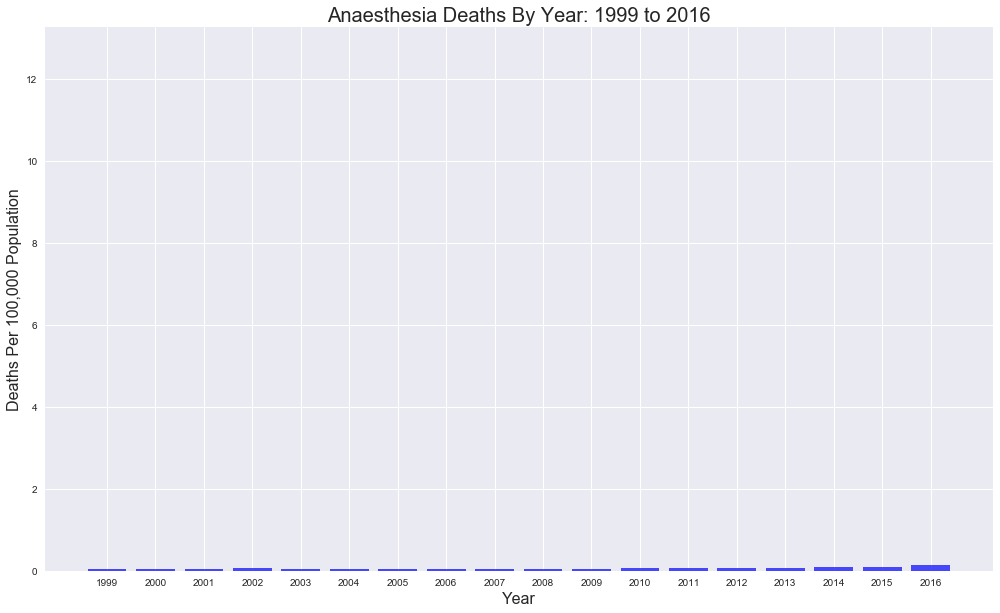

In [24]:
plt.show()                                                                   # displays plot

#### Who is affected?

In [25]:
filename = 'Q1DS3.csv'                                                       # 3rd data file for Q1
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to read data
q1ds3_df = pd.read_csv(csv_file)                                             # reads data from file
plt.figure(figsize = (12,10))                                                # sets bar chart parameters
plt.title('Opioid Death Rate By Gender', fontdict = {'fontsize': 20})
plt.xlabel('Gender', fontdict = {'fontsize': 16})
plt.ylabel('Deaths Per 100,000 Population', fontdict = {'fontsize': 16})
xvals = np.arange(len(q1ds3_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, q1ds3_df['Death Rate'], color='r', alpha=0.7, align="edge")
plt.xticks(tick_locations, q1ds3_df['Gender'], rotation="horizontal")

([<matplotlib.axis.XTick at 0x28643080710>,
 <a list of 2 Text xticklabel objects>)

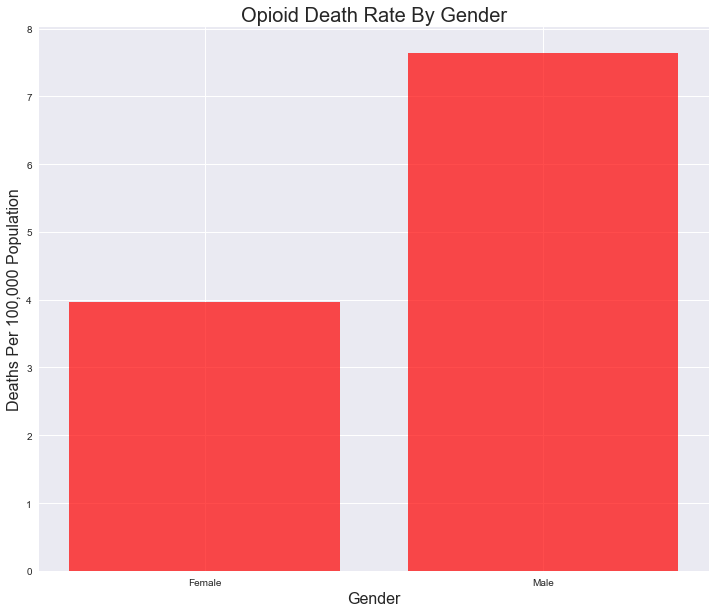

In [26]:
plt.show()                                                                   # displays plot

In [27]:
filename = 'Q1DS4.csv'                                                       # 4th data file for Q1
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to read data
q1ds4_df = pd.read_csv(csv_file)                                             # reads data from file
plt.figure(figsize = (12,10))                                                # sets bar chart parameters
plt.title('Opioid Death Rate By Age Group', fontdict = {'fontsize': 20})
plt.xlabel('Ten-Year Age Groups', fontdict = {'fontsize': 16})
plt.ylabel('Deaths Per 100,000 Population', fontdict = {'fontsize': 16})
xvals = np.arange(len(q1ds4_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, q1ds4_df['Death Rate'], color='r', alpha=0.7, align="edge")
plt.xticks(tick_locations, q1ds4_df['Ten-Year Age Groups'], rotation="horizontal")

([<matplotlib.axis.XTick at 0x28642c23390>,
 <a list of 11 Text xticklabel objects>)

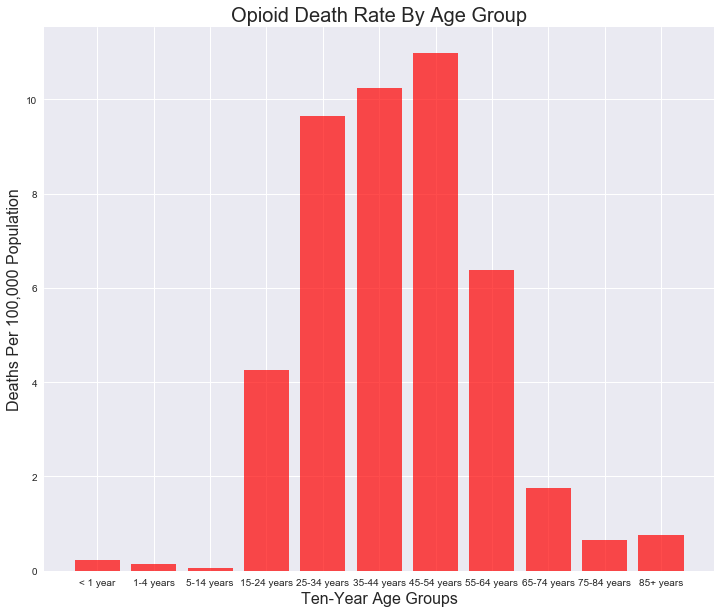

In [28]:
plt.show()                                                                   # displays plot

In [29]:
filename = 'Q1DS5.csv'                                                       # 5th data file for Q1
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to read data
q1ds5_df = pd.read_csv(csv_file)                                             # 5th data file for Q1
plt.figure(figsize = (12,10))                                                # sets bar chart parameters
plt.title('Opioid Death Rate By Race', fontdict = {'fontsize': 20})
plt.xlabel('Race', fontdict = {'fontsize': 16})
plt.ylabel('Deaths Per 100,000 Population', fontdict = {'fontsize': 16})
xvals = np.arange(len(q1ds5_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, q1ds5_df['Death Rate'], color='r', alpha=0.7, align="edge")
plt.xticks(tick_locations, q1ds5_df['Race'], rotation="horizontal")

([<matplotlib.axis.XTick at 0x286429f1710>,
 <a list of 4 Text xticklabel objects>)

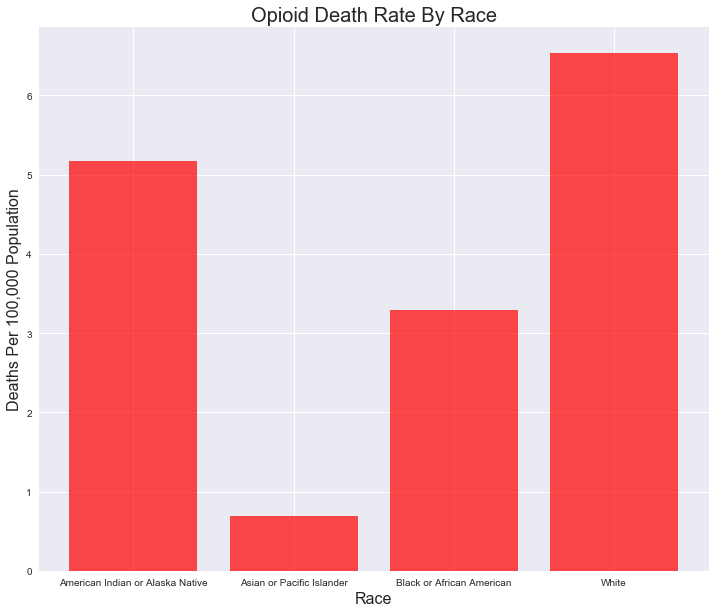

In [30]:
plt.show()                                                                   # displays plot

#### Where is it occuring?

In [31]:
filename = 'Q1DS6.csv'                                                       # 6th data file for Q1
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to read data

In [32]:
q1ds6_df = pd.read_csv(csv_file)                                             # 6th data file for Q1
deaths_mean = q1ds6_df['Death Rate'].mean()                                  # extracts mean of death rate

In [33]:
filename = 'Q1DS6.json'                                                      # deaths data file for Q1
json_file_1 = os.path.join(".", "Data Files", "Question_1", filename)        # creates path to read data
filename = 'gz_2010_us_050_00_20m.json'                                      # map shape data file for Q1
json_file_2 = os.path.join(".", "Data Files", "Question_1", filename)        # creates path to read data

In [34]:
# function finds the death rate for the selected county, and converts it to color
def get_color(properties):
    key = str(int(properties['STATE'])) + properties['COUNTY']
    if key in Q1DS6:
        return cmap.to_color(Q1DS6.get(key), deaths_mean, 'lin')
    else:
        return [0, 0, 0, 0]

In [35]:
with open(json_file_1) as fin:                                              # opens json file
    Q1DS6 = json.load(fin)

In [36]:
cmap = ColorMap('Reds', alpha=255, levels=10)                               # displays map plot
geoplotlib.geojson(json_file_2, fill=True, color=get_color, f_tooltip=lambda properties: properties['NAME'])
geoplotlib.geojson(json_file_2, fill=False, color=[255, 255, 255, 64])
geoplotlib.set_bbox(BoundingBox.USA)
geoplotlib.show()

#### Research Question 2

#### Research Question 3
####  - Impact of the opioid epidemic
Are urban areas impacted more by the opioid epidemic? Scatterplot of Urban vs. not urban 

In [41]:
#importing csv files

csv_file = r'Data Files/Question_3/ChangeOpiodDeaths(00-10).csv'

OpDeathsDelta_df = pd.read_csv(csv_file)


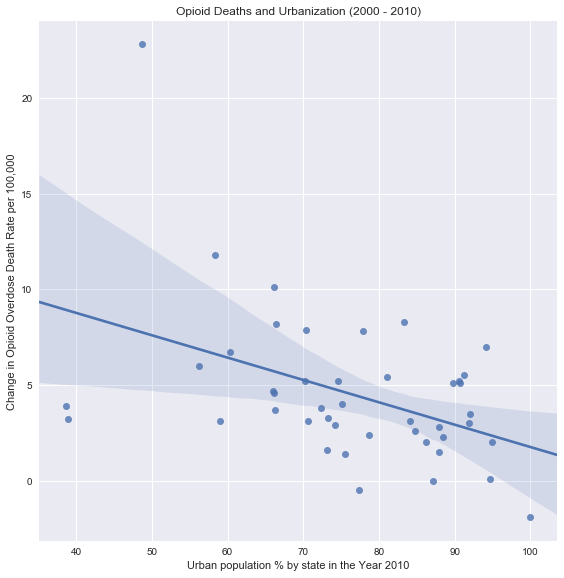

In [39]:
# scatterplot: Urban population % by state in year 2010 on change in opioid death rates from years 2000-2010 

sns.lmplot(x='2010', y='Change in Death', data = OpDeathsDelta_df, size = 8)

# set titles and labels
plt.title('Opioid Deaths and Urbanization (2000 - 2010)')
plt.xlabel('Urban population % by state in the Year 2010')
plt.ylabel('Change in Opioid Overdose Death Rate per 100,000')
plt.show()

#### - Crime and opioids

In [62]:
#importing csv file of overall crime

csv_file = r'Data Files/Question_3/crime_df.csv'

crime_df = pd.read_csv(csv_file)

#importing Opioid deaths df 

csv_file1 = r'Data Files/Question_3/OpiodDeathsUrbanPop.csv'

OpDeaths_Urb_df = pd.read_csv(csv_file1)


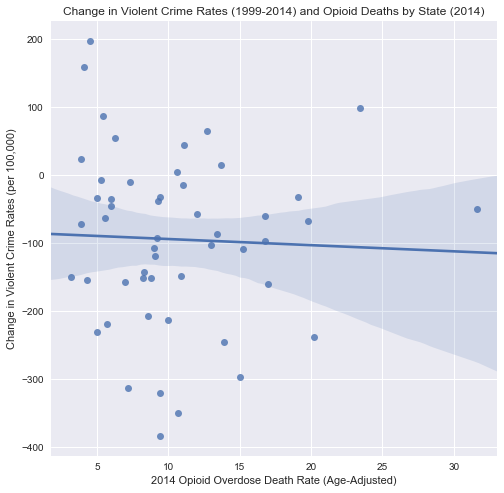

In [60]:
# Scatterplot of change in violent crime and opioid deaths in 2014
plt.figure(figsize=(8,8))
# scatter with regression line. 
sns.regplot(x=OpDeaths_Urb_df['2014__Opioid Overdose Death Rate (Age-Adjusted)'],\
           y=crime_df['Violent Crime rate_change'])
            #For some reason sns.lmplot doesn't work with data from two df's but sns.regplot does.

# set title and labels
plt.title('Change in Violent Crime Rates (1999-2014) and Opioid Deaths by State (2014)')
plt.xlabel('2014 Opioid Overdose Death Rate (Age-Adjusted)')
plt.ylabel('Change in Violent Crime Rates (per 100,000)')
plt.show()



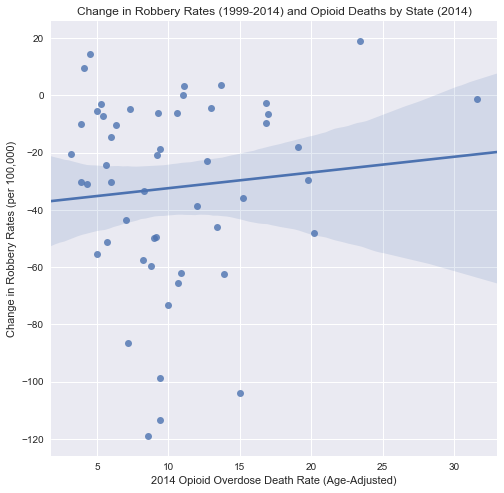

In [61]:
# Scatterplot of change in robbery rates and opioid deaths in 2014
plt.figure(figsize=(8,8))
sns.regplot(x=OpDeaths_Urb_df['2014__Opioid Overdose Death Rate (Age-Adjusted)'],\
           y=crime_df['Robbery rate_change'])

# set title and labels
plt.title('Change in Robbery Rates (1999-2014) and Opioid Deaths by State (2014)')
plt.xlabel('2014 Opioid Overdose Death Rate (Age-Adjusted)')
plt.ylabel('Change in Robbery Rates (per 100,000)')
plt.show()

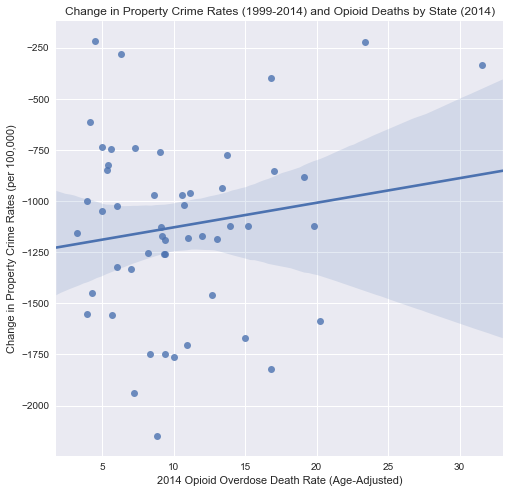

In [59]:
# Scatterplot of change in property crime rates and opioid deaths in 2014
plt.figure(figsize=(8,8))
sns.regplot(x=OpDeaths_Urb_df['2014__Opioid Overdose Death Rate (Age-Adjusted)'],\
           y=crime_df['Property crime rate_change'])

# set title and labels
plt.title('Change in Property Crime Rates (1999-2014) and Opioid Deaths by State (2014)')
plt.xlabel('2014 Opioid Overdose Death Rate (Age-Adjusted)')
plt.ylabel('Change in Property Crime Rates (per 100,000)')
plt.show()

#### Research Question 4